# Parkinson Disease detection

Parkinson Disease is a brain neurological disorder. It leads to shaking of the body, hands and provides stiffness to the body. No proper cure or treatment is available yet at the advanced stage. Treatment is possible only when done at the early or onset of the disease. These will not only reduce the cost of the disease but will also possibly save a life. Most methods available can detect Parkinson in an advanced stage; which means loss of approx. 60% dopamine in basal ganglia and is responsible for controlling the movement of the body with a small amount of dopamine. More than 145,000 people have been found alone suffering in the U.K and in India, almost one million population suffers from this disease and it’s spreading fast in the entire world.

Machine learning is a discipline of artificial intelligence that develops algorithms with the capacity to generalize behaviors and recognize hidden patterns in a large amount of data, defined by Arthur Samuel as the field of study that gives computers the ability to learn without being explicitly programmed. ML techniques can be classified into two categories depending on the type of processing that is carried out: symbolic processing, which uses formal languages, logical orders, and symbols, and sub symbolic processing, which is designed to estimate functional relationships between data. Within ML techniques, artificial neural networks (ANN) are those whose architecture is based in multiple-layer hierarchical models that can learn representations of data with multiple levels of abstraction. However, they require a large amount of input data and a careful training process. All these techniques are receiving increasing interest from the medical domain, where they have been mostly used in image analysis , although in recent years, their application has spread to other areas .

There are a wide variety of techniques in the field of neurology that are used individually or in combination to support the clinical diagnosis. Commonly used techniques include image-based tests (single photon emission computed tomography (SPECT), M-iodobenzyl-guanidine cardiac scintiscan (MIBG), however, these are costly and are not always accessible.

The analysis of EEG has already been used in other non-epileptic neurological diseases such as Alzheimer’s, schizophrenia, and major depressive disorder  and there are numerous articles that apply ML techniques to study their EEG . EEG processing using ML techniques has also been used for therapeutic purposes such as stroke rehabilitation . The use of EEG to study Parkinson’s disease has not been fully validated, but in the last 5 years, its interest has increased with the introduction of ML techniques in EEG analysis, leading to a growing development of the literature. The aim of this review consists, firstly, in evaluating the current impact of ML techniques on the EEG analysis of patients with PD, and secondly, naming the most commonly used techniques and analyzing those that have provided the best results. These objectives, focused on the diagnosis and evolution of PD, will provide an entry point for further studies seeking to determine an early, non-invasive and accessible diagnostic marker that minimizes the delay on the disease diagnosis. Hopefully, the advances in new diagnostic techniques in PD could help to detect this disease in its early stages, that is, in pre-motor stage, favouring the development of preventive therapies that slow the degree of advancement of motor and cognitive decline in PD.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
prk=pd.read_csv(r'''C:\Users\Asus\Downloads\parkinsons_1.csv''',encoding='cp1252')

Importing models from dataset

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [4]:
def acc_sensitivity_specificity(c, p): # corr, pred
    cmatrix = confusion_matrix(c,p)
    total = sum(sum(cmatrix))
    accuracy=(cmatrix[0,0]+cmatrix[1,1])/total
    spec = cmatrix[0,0]/(cmatrix[0,0]+cmatrix[0,1])
    sens = cmatrix[1,1]/(cmatrix[1,0]+cmatrix[1,1])
    return accuracy, sens, spec

In [5]:
prk

,id,gender,PPE,DFA,RPDE,numPulses,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...
145,48,1,0.77259,0.62492,0.19559,577,3.9883,16.9370,0
146,48,1,0.78213,0.61626,0.17873,598,10.1016,7.5574,0
147,49,0,0.84982,0.56003,0.46637,488,2.6097,3.3055,0
148,49,0,0.85716,0.55320,0.34818,497,3.4696,4.1175,0


prk.info()

Data Split

In [7]:
prk['class']=prk['class'].interpolate()
X = prk.drop(['class'],axis=1).values
y = prk['class'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.83      0.96      0.89        25

    accuracy                           0.84        38
   macro avg       0.86      0.79      0.81        38
weighted avg       0.85      0.84      0.83        38

Accuracy Specificity Sensitivity
----------------------
[[ 800  500]
 [ 100 2400]]


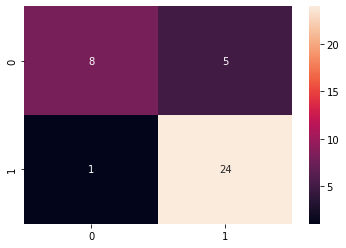

In [8]:
nb_clf=GaussianNB()
nb_clf.fit(X_train,Y_train)
nb_clf.score(X_test,Y_test)

y_predict_nb = nb_clf.predict(X_test)
#y_test= np.argmax(y_predict_nb, axis = 0)
nb_cm = confusion_matrix(Y_test, y_predict_nb)
sns.heatmap(nb_cm, annot=True)

print(classification_report(Y_test,y_predict_nb))
print('Accuracy', 'Specificity', 'Sensitivity')
print('----------------------')
print(np.round(nb_cm,4)*100)

pred_prob_nb = nb_clf.predict_proba(X_test)
fpr_nb, tpr_nb, thresh_nb = roc_curve(Y_test, pred_prob_nb[:,1], pos_label=1)

# KNN Classifier

              precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.76      0.76      0.76        25

    accuracy                           0.68        38
   macro avg       0.65      0.65      0.65        38
weighted avg       0.68      0.68      0.68        38

Accuracy Specificity Sensitivity
----------------------
[68.42 76.   53.85]


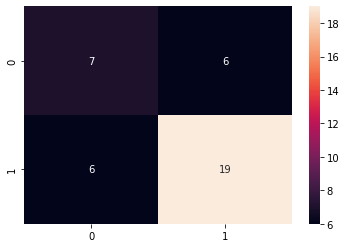

In [9]:
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,Y_train)
knn_clf.score(X_test,Y_test)

y_predict_knn = knn_clf.predict(X_test)
knn_cm = confusion_matrix(Y_test, y_predict_knn)
sns.heatmap(knn_cm, annot=True)

print(classification_report(Y_test,y_predict_knn))
knn_cm = acc_sensitivity_specificity(Y_test, y_predict_knn)
print('Accuracy', 'Specificity', 'Sensitivity')
print('----------------------')
print(np.round(knn_cm,4)*100)

pred_prob_knn = knn_clf.predict_proba(X_test)
fpr_knn, tpr_knn, thresh_knn = roc_curve(Y_test, pred_prob_knn[:,1], pos_label=1)

# Logistice Regression

              precision    recall  f1-score   support

           0       1.00      0.38      0.56        13
           1       0.76      1.00      0.86        25

    accuracy                           0.79        38
   macro avg       0.88      0.69      0.71        38
weighted avg       0.84      0.79      0.76        38

Accuracy Specificity Sensitivity
----------------------
[ 78.95 100.    38.46]


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


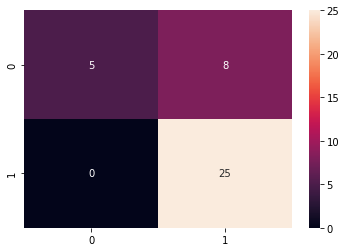

In [10]:
lr_clf=LogisticRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

y_predict_lr = lr_clf.predict(X_test)
lr_cm = confusion_matrix(Y_test, y_predict_lr)
sns.heatmap(lr_cm, annot=True)

print(classification_report(Y_test,y_predict_lr))
lr_cm = acc_sensitivity_specificity(Y_test, y_predict_lr)
print('Accuracy', 'Specificity', 'Sensitivity')
print('----------------------')
print(np.round(lr_cm,4)*100)

pred_prob_lr = lr_clf.predict_proba(X_test)
fpr_lr, tpr_lr, thresh_lr = roc_curve(Y_test, pred_prob_lr[:,1], pos_label=1)

# SVM Linear Kernel

              precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.77      0.96      0.86        25

    accuracy                           0.79        38
   macro avg       0.82      0.71      0.73        38
weighted avg       0.80      0.79      0.77        38

Accuracy Specificity Sensitivity
----------------------
[[ 800  500]
 [ 100 2400]]


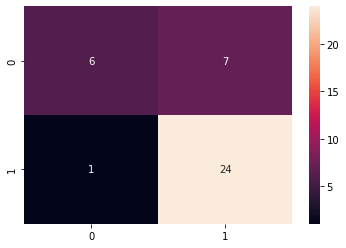

In [11]:
svl_clf=SVC(kernel='linear', probability = True)
svl_clf.fit(X_train,Y_train)
svl_clf.score(X_test,Y_test)

y_predict_svl = svl_clf.predict(X_test)
svl_cm = confusion_matrix(Y_test, y_predict_svl)
sns.heatmap(svl_cm, annot=True)

print(classification_report(Y_test,y_predict_svl))
svl_cm = acc_sensitivity_specificity(Y_test, y_predict_svl)
print('Accuracy', 'Specificity', 'Sensitivity')
print('----------------------')
print(np.round(nb_cm,4)*100)

pred_prob_svl = svl_clf.predict_proba(X_test)
fpr_svl, tpr_svl, thresh_svl = roc_curve(Y_test, pred_prob_svl[:,1], pos_label=1)

# SVM Polynomial Kernel

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.71      1.00      0.83        25

    accuracy                           0.74        38
   macro avg       0.86      0.62      0.60        38
weighted avg       0.81      0.74      0.68        38

Accuracy Specificity Sensitivity
----------------------
[[ 800  500]
 [ 100 2400]]


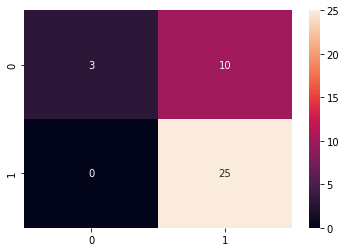

In [12]:
svp_clf=SVC(kernel = 'poly',probability = True)
svp_clf.fit(X_train,Y_train)
svp_clf.score(X_test,Y_test)

y_predict_svp = svp_clf.predict(X_test)
svp_cm = confusion_matrix(Y_test, y_predict_svp)
sns.heatmap(svp_cm, annot=True)

print(classification_report(Y_test,y_predict_svp))
svp_cm = acc_sensitivity_specificity(Y_test, y_predict_svp)
print('Accuracy', 'Specificity', 'Sensitivity')
print('----------------------')
print(np.round(nb_cm,4)*100)

pred_prob_svp = svp_clf.predict_proba(X_test)
fpr_svp, tpr_svp, thresh_svp = roc_curve(Y_test, pred_prob_svp[:,1], pos_label=1)

# SVM RBF Kernel

              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.69      1.00      0.82        25

    accuracy                           0.71        38
   macro avg       0.85      0.58      0.54        38
weighted avg       0.80      0.71      0.63        38

Accuracy Specificity Sensitivity
----------------------
[[ 800  500]
 [ 100 2400]]


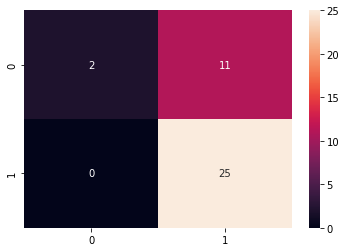

In [14]:
svr_clf=SVC(kernel = 'rbf',probability = True)
svr_clf.fit(X_train,Y_train)
svr_clf.score(X_test,Y_test)

y_predict_svr = svr_clf.predict(X_test)
svr_cm = confusion_matrix(Y_test, y_predict_svr)
sns.heatmap(svr_cm, annot=True)

print(classification_report(Y_test,y_predict_svr))
svr_cm = acc_sensitivity_specificity(Y_test, y_predict_svr)
print('Accuracy', 'Specificity', 'Sensitivity')
print('----------------------')
print(np.round(nb_cm,4)*100)

pred_prob_svr = svr_clf.predict_proba(X_test)
fpr_svr, tpr_svr, thresh_svr = roc_curve(Y_test, pred_prob_svr[:,1], pos_label=1)

# AUC Score Calculation

In [17]:
auc_score_nb = roc_auc_score(Y_test, pred_prob_nb[:,1])
auc_score_knn = roc_auc_score(Y_test, pred_prob_knn[:,1])
auc_score_lr = roc_auc_score(Y_test, pred_prob_lr[:,1])
auc_score_svl = roc_auc_score(Y_test, pred_prob_svl[:,1])
auc_score_svp = roc_auc_score(Y_test, pred_prob_svp[:,1])
auc_score_svr = roc_auc_score(Y_test, pred_prob_svr[:,1])

print('Area Under ROC for Naive Bayes Classifier : ', auc_score_nb)
print('Area Under ROC for KNN Classifier : ', auc_score_knn)
print('Area Under ROC for Logistic Regression : ', auc_score_lr)
print('Area Under ROC for SVM Linear kernel : ', auc_score_svl)
print('Area Under ROC for SVM Polynomial kernel : ', auc_score_svp)
print('Area Under ROC for SVM RBF kernel : ', auc_score_svr)

Area Under ROC for Naive Bayes Classifier :  0.8523076923076924
Area Under ROC for KNN Classifier :  0.823076923076923
Area Under ROC for Logistic Regression :  0.8492307692307692
Area Under ROC for SVM Linear kernel :  0.8153846153846154
Area Under ROC for SVM Polynomial kernel :  0.8615384615384615
Area Under ROC for SVM RBF kernel :  0.8276923076923076


# ROC Curve

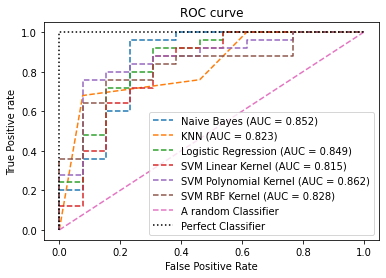

In [18]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

plt.plot(fpr_nb, tpr_nb, linestyle='--', label = 'Naive Bayes (AUC = %0.3f)' % (auc_score_nb))
plt.plot(fpr_knn, tpr_knn, linestyle='--', label = 'KNN (AUC = %0.3f)' % (auc_score_knn))
plt.plot(fpr_lr, tpr_lr, linestyle='--', label = 'Logistic Regression (AUC = %0.3f)' % (auc_score_lr))
plt.plot(fpr_svl, tpr_svl, linestyle='--', label = 'SVM Linear Kernel (AUC = %0.3f)' % (auc_score_svl))
plt.plot(fpr_svp, tpr_svp, linestyle='--', label = 'SVM Polynomial Kernel (AUC = %0.3f)' % (auc_score_svp))
plt.plot(fpr_svr, tpr_svr, linestyle='--', label = 'SVM RBF Kernel (AUC = %0.3f)' % (auc_score_svr))

plt.plot(p_fpr, p_tpr, linestyle='--', label = 'A random Classifier')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color = 'black', label='Perfect Classifier')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

# Conclusion

Machine learning techniques play a fundamental role in data analysis, allowing one to obtain patterns and relationships between different classes automatically and efficiently. These techniques are increasingly being applied to EEG analysis, facilitating the use of this low-cost clinical test to detect or extract information on various neurological diseases. Despite the limited number of articles found, it can be noticed that the studies using the resting state tests to classify PD predominate, emphasizing a lack of studies using motor activation tests as well as studies focused on the progression of the disease. There is a great heterogeneity in the data provided by the articles, with a lack of clinical variables such as the use of medication during the recordings and the stage of the disease. In general, the size of the datasets considered in the studies is relatively small compared to the one usually found in the ML literature. However, the selected articles exhibited good results in the classification problem, with values higher than 90% in various studies. A further analysis of the models considered in these articles indicated that both the features introduced into the model and its architecture were essential for a good performance in predicting the classification. On the contrary, the cleaning protocol of the EEG, which was highly heterogeneous among the different studies, did not influence the results, and thus it could be omitted. Since this cleaning process is usually carried out manually, omitting it would benefit the development of an efficient and fast automatic prediction model. Finally, it should be emphasized that ML techniques have experienced significant growth in recent years, incorporating more complex models, and thus, this review and the conclusions obtained herein should be considered as a first step in the analysis of the role played by ML techniques and EEG in the study of PD.